In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import streamlit as st

In [2]:
# Load data from https://barttorvik.com/trank.php#
# http://barttorvik.com/2023_team_results.csv
#data = pd.read_csv('/Users/laceymalarky/Downloads/2023_team_results.csv', index_col=False)

#url = 'http://barttorvik.com/2023_team_results.csv'
#response = requests.get(url).content 
#data_test = pd.read_csv(io.StringIO(response.decode('utf-8')))

data = pd.read_csv('http://barttorvik.com/2023_team_results.csv', index_col = False)
data.head()


/var/folders/61/dg8q01vd63s1rx311g530r400000gn/T/ipykernel_11207/3631578078.py:9: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv('http://barttorvik.com/2023_team_results.csv', index_col = False)


,rank,team,conf,record,adjoe,oe Rank,adjde,de Rank,barthag,rank.1,...,ConPF,ConPA,ConPoss,ConOE,ConDE,ConSOSRemain,Conf Win%,WAB,WAB Rk,"Fun Rk, adjt"
0,1,Houston,Amer,27-2,121.487533,3,91.916658,7,0.961123,1,...,1242.0,973.0,1035.3375,1.199609,0.939790,0.768637,0.937500,7.038925,3,115
1,2,Alabama,SEC,25-4,118.450875,13,91.474862,5,0.951293,2,...,1344.0,1046.0,1167.5000,1.151178,0.895931,0.871818,0.937500,8.565746,2,64
2,3,UCLA,P12,25-4,114.635604,30,89.898718,2,0.942425,3,...,1239.0,1052.0,1162.3625,1.065933,0.905053,0.797730,0.888889,6.772666,4,110
3,4,Tennessee,SEC,21-8,112.004033,60,87.952205,1,0.941587,4,...,1105.0,941.0,1032.9875,1.069713,0.910950,0.882127,0.625000,2.975169,22,345
4,5,Purdue,B10,24-5,119.105581,12,94.514473,15,0.934592,5,...,1279.0,1150.0,1148.9375,1.113202,1.000925,0.792134,0.722222,6.443814,5,120


In [3]:
data.shape

(363, 44)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              363 non-null    int64  
 1   team              363 non-null    object 
 2   conf              363 non-null    object 
 3   record            363 non-null    object 
 4   adjoe             363 non-null    float64
 5   oe Rank           363 non-null    int64  
 6   adjde             363 non-null    float64
 7   de Rank           363 non-null    int64  
 8   barthag           363 non-null    float64
 9   rank.1            363 non-null    int64  
 10  proj. W           363 non-null    float64
 11  Proj. L           363 non-null    float64
 12  Pro Con W         363 non-null    float64
 13  Pro Con L         363 non-null    float64
 14  Con Rec.          363 non-null    object 
 15  sos               363 non-null    float64
 16  ncsos             363 non-null    float64
 1

In [5]:
data.columns

Index(['rank', 'team', 'conf', 'record', 'adjoe', 'oe Rank', 'adjde',
       'de Rank', 'barthag', 'rank.1', 'proj. W', 'Proj. L', 'Pro Con W',
       'Pro Con L', 'Con Rec.', 'sos', 'ncsos', 'consos', 'Proj. SOS',
       'Proj. Noncon SOS', 'Proj. Con SOS', 'elite SOS', 'elite noncon SOS',
       'Opp OE', 'Opp DE', 'Opp Proj. OE', 'Opp Proj DE', 'Con Adj OE',
       'Con Adj DE', 'Qual O', 'Qual D', 'Qual Barthag', 'Qual Games', 'FUN',
       'ConPF', 'ConPA', 'ConPoss', 'ConOE', 'ConDE', 'ConSOSRemain',
       'Conf Win%', 'WAB', 'WAB Rk', 'Fun Rk, adjt'],
      dtype='object')

In [6]:
#Filter dataframe for only certain cols
data = data[['rank', 'team', 'conf', 'record', 'adjoe', 'adjde',
       'sos', 'consos', 'Conf Win%', 'Fun Rk, adjt']]

<AxesSubplot:xlabel='adjoe', ylabel='adjde'>

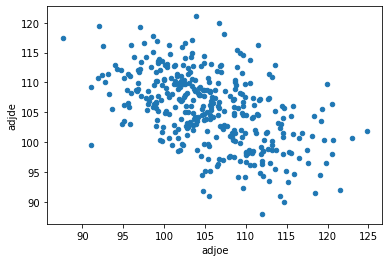

In [7]:
# Create a scatterplot of offense vs defense
data.plot(x = 'adjoe', y = 'adjde', kind = 'scatter')

In [8]:
# Test correlation for fun
data['adjoe'].corr(data['adjde'])

-0.5035986998748294

In [9]:
# List of unique conferences
data['conf'].unique()

array(['Amer', 'SEC', 'P12', 'B10', 'WCC', 'BE', 'MWC', 'B12', 'ACC',
       'ASun', 'CUSA', 'A10', 'MVC', 'CAA', 'MAAC', 'WAC', 'Sum', 'MAC',
       'Ivy', 'SB', 'SC', 'BW', 'AE', 'BSky', 'Pat', 'Horz', 'BSth',
       'SWAC', 'MEAC', 'Slnd', 'OVC', 'NEC', 'ind'], dtype=object)

In [10]:
#creating header with an option to filter the data and the checkbox:
#dataset includes all teams but this will let users decide whether they want
#to see all teams or just those in the top 10 conferences

st.header("NCAA Men's Backetball Statistics")
st.write("""
##### Filter the data below to see only team in the top 10 conferences
""")
conf_top_10 = st.checkbox('Top 10 Conferences Only')


2023-02-27 18:57:18.551 
  command:

    streamlit run /Users/laceymalarky/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [11]:
conf_top_10

False

In [12]:
top10_conf = ['B12', 'SEC', 'B10', 'BE', 'P12', 'ACC', 'MWC', 'Amer', 'WCC', 'A10']

if not conf_top_10:
    data = data.query('conf in @top10_conf')

In [13]:
#creating options for filter from all teams and different years
team_choice = data['team'].unique()
make_choice_team = st.selectbox('Select team:', team_choice)

In [14]:
make_choice_team

'Houston'

In [15]:
#filtering dataset on chosen team and ...
filtered_type=data[(data.team==make_choice_team)]

#showing the final table in streamlit
st.table(filtered_type)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [16]:
data

,rank,team,conf,record,adjoe,adjde,sos,consos,Conf Win%,"Fun Rk, adjt"
0,1,Houston,Amer,27-2,121.487533,91.916658,0.588987,0.635124,0.937500,115
1,2,Alabama,SEC,25-4,118.450875,91.474862,0.711078,0.723820,0.937500,64
2,3,UCLA,P12,25-4,114.635604,89.898718,0.655903,0.727374,0.888889,110
3,4,Tennessee,SEC,21-8,112.004033,87.952205,0.649181,0.720633,0.625000,345
4,5,Purdue,B10,24-5,119.105581,94.514473,0.672440,0.756215,0.722222,120
...,...,...,...,...,...,...,...,...,...,...
231,232,Loyola Chicago,A10,9-19,102.151734,107.001916,0.523122,0.583247,0.187500,306
234,235,Minnesota,B10,7-20,100.254256,105.139620,0.661055,0.814977,0.058824,221
264,265,California,P12,3-26,97.883706,105.368682,0.681525,0.755707,0.111111,352
271,272,Louisville,ACC,4-25,102.125043,110.279838,0.643998,0.686941,0.111111,342


In [23]:
st.header('Team analysis')
st.write("""
###### Let's analyze what influences price the most. We will check how distibution of price varies depending on 
transmission, engine or body type and state
""")

import plotly.express as px

# Will create histograms with the split by parameter of choice: color, transmission, engine_type, body_type, state

#creating list of options to choose from
list_for_hist=['Conf Win%','consos']

#creating selectbox
choice_for_hist = st.selectbox('Split for price distribution', list_for_hist)

#plotly histogram, where price_usd is split by the choice made in the selectbox
fig1 = px.histogram(data, x=choice_for_hist)

#adding tittle
fig1.update_layout(
title="<b> Split of price by {}</b>".format(choice_for_hist))

#embedding into streamlit
st.plotly_chart(fig1)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [24]:
fig1.show()

In [25]:
st.write("""
###### Now let's check how price is affected by odometer, engine capacity or number of photos in the adds
""")

#Distribution of price depending on odometer_value,engine_capacity,number_of_photos
#with the split by age category

#list_for_scatter=['odometer_value','engine_capacity','number_of_photos']
#choice_for_scatter = st.selectbox('Price dependency on ', list_for_scatter)
fig2 = px.scatter(data, x="adjoe", y='adjde',hover_data=['team'])

fig2.update_layout(
title="<b> Offense vs Defense</b>")
st.plotly_chart(fig2)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [26]:
fig2

In [ ]:
#streamlit run streamlit_workshop.py

<AxesSubplot:ylabel='Frequency'>

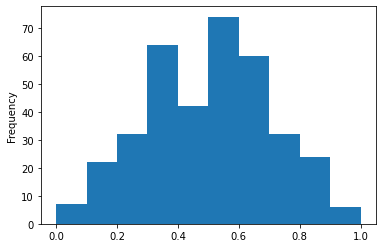

In [11]:
data['Conf Win%'].plot(kind = 'hist')


<AxesSubplot:ylabel='Frequency'>

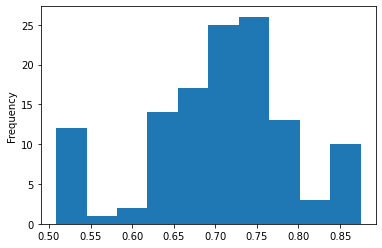

In [17]:
data['consos'].plot(kind = 'hist')


<AxesSubplot:xlabel='Conf Win%', ylabel='consos'>

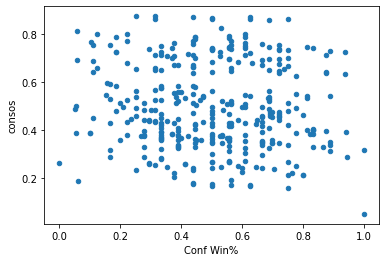

In [12]:
data.plot(x = 'Conf Win%', y = 'consos', kind = 'scatter')

<AxesSubplot:title={'center':'rank'}, xlabel='conf'>

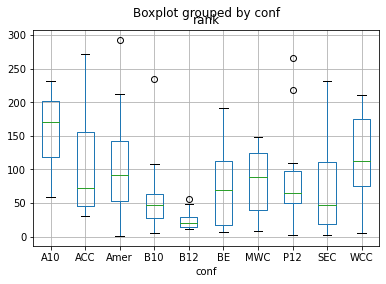

In [13]:
data_top10_conf.boxplot(column = 'rank', by = 'conf')